# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [36]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn. cluster import KMeans

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [8]:
def GUC_Distance(Cluster_Centroids, Data_points, Distance_Type):
    """
    Calculate the distance between cluster centroids and data points.

    Parameters:
        Cluster_Centroids (ndarray): Array of shape (K, n_features) representing K cluster centroids.
        Data_points (ndarray): Array of shape (m, n_features) representing m data points.
        Distance_Type (str): Type of distance to calculate. Either "euclidean" or "pearson".

    Returns:
        ndarray: Array of shape (m, K) containing distances between each data point and each centroid.
    """
    m, _ = Data_points.shape
    K, n_features = Cluster_Centroids.shape
    
    if Distance_Type == "euclidean":
        # Calculate Euclidean distance
        distances = np.sqrt(np.sum((Data_points[:, np.newaxis] - Cluster_Centroids) ** 2, axis=2))
    elif Distance_Type == "pearson":
        # Calculate Pearson correlation distance
        mean_data = np.mean(Data_points, axis=1, keepdims=True)
        mean_centroids = np.mean(Cluster_Centroids, axis=1, keepdims=True)
        centered_data = Data_points - mean_data
        centered_centroids = Cluster_Centroids - mean_centroids
        data_norm = np.linalg.norm(centered_data, axis=1, keepdims=True)
        centroid_norm = np.linalg.norm(centered_centroids, axis=1, keepdims=True)
        corr = np.dot(centered_data, centered_centroids.T) / (data_norm * centroid_norm.T)
        distances = 1 - corr
    else:
        raise ValueError("Distance_Type must be either 'euclidean' or 'pearson'.")

    return distances

# Example for testing by using any number of features
np.random.seed(0)
num_features = 5  # Number of features
num_clusters = 3  # Number of clusters
num_data_points = 4  # Number of data points

# Generate random data
Cluster_Centroids = np.random.rand(num_clusters, num_features)
Data_points = np.random.rand(num_data_points, num_features)

print(Data_points)
print(Cluster_Centroids)
# Calculate distances using Euclidean distance
distances_euclidean = GUC_Distance(Cluster_Centroids, Data_points, Distance_Type="euclidean")
print("Euclidean distances:")
print(distances_euclidean.T)  # Transpose the distances matrix to match the expected shape

# Calculate distances using Pearson correlation distance
distances_pearson = GUC_Distance(Cluster_Centroids, Data_points, Distance_Type="pearson")
print("\nPearson correlation distances:")
print(distances_pearson)


[[0.0871293  0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918 0.11827443]
 [0.63992102 0.14335329 0.94466892 0.52184832 0.41466194]
 [0.26455561 0.77423369 0.45615033 0.56843395 0.0187898 ]]
[[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
 [0.64589411 0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606]]
Euclidean distances:
[[1.00131034 0.60044184 0.67291007 0.51986005]
 [0.8723975  0.72831543 0.5343987  0.85889097]
 [1.21873227 0.37762907 0.77111877 0.69347955]]

Pearson correlation distances:
[[1.61705212 0.61382381 1.28594208]
 [0.42439063 0.70218968 0.14528429]
 [1.22312183 0.31657286 0.75545806]
 [0.0917468  0.70832244 0.45910304]]


> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [11]:
def GUC_Kmean(Data_points, Number_of_Clusters, Distance_Type, max_iter=100, tol=1e-4):
    
    # Initialize cluster centroids randomly
    np.random.seed(0)
    n_samples, n_features = Data_points.shape
    cluster_centroids = np.random.rand(Number_of_Clusters, n_features)
    
    # Initialize cluster assignments
    cluster_assignments = np.zeros(n_samples)
    
    # Initialize distortion function (cluster metric) and previous distortion
    distortion = float('inf')
    prev_distortion = float('inf')
    
    # Loop until convergence or maximum iterations reached
    for _ in range(max_iter):
        # Cluster Assignment
        distances = GUC_Distance(cluster_centroids, Data_points, Distance_Type)
        cluster_assignments = np.argmin(distances, axis=1)
        # Calculate mean square distance for each cluster
        mean_square_distances = np.array([np.mean(np.sum((Data_points[cluster_assignments == i] - cluster_centroids[i])**2, axis=1)) for i in range(Number_of_Clusters)])
        # Update distortion function
        distortion = np.sum(mean_square_distances)
        # Stopping condition
        if np.abs(prev_distortion - distortion) < tol:
            break
        prev_distortion = distortion
        
        # Update Centroids
        for i in range(Number_of_Clusters):
            cluster_centroids[i] = np.mean(Data_points[cluster_assignments == i], axis=0)
    
    return mean_square_distances, distortion  

# Example usage:
np.random.seed(0)
num_features = 2
num_data_points = 100
data_points = np.random.randn(num_data_points, num_features)

num_clusters = 3
distance_type = "euclidean"
final_cluster_distance, cluster_metric = GUC_Kmean(data_points, num_clusters, distance_type)
print("Final cluster distances:", final_cluster_distance)
print("Cluster metric (Distortion Function):", cluster_metric)

Final cluster distances: [0.87907953 1.02542058 0.74280863]
Cluster metric (Distortion Function): 2.647308747622762


## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [3]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [29]:
import matplotlib.pyplot as plt
from itertools import combinations

# helper function that allows us to display data in 2 dimensions an highlights the clusters

def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)


# def display_cluster(X, km=[], num_clusters=0):
#     color = 'brgcmyk'  # List colors
#     alpha = 0.5  # color opacity
#     s = 20

#     n_dimensions = X.shape[1]
#     dimension_combinations = list(combinations(range(n_dimensions), 2))

#     if not dimension_combinations:  # No dimension combinations available
#         plt.scatter(X[:, 0], X[:, 0], c='b', alpha=alpha, s=s)
#         plt.xlabel('Dimension 1')
#         plt.ylabel('Dimension 1')
#         plt.title('Data Points')
#         plt.show()
#     else:
#         num_subplots = len(dimension_combinations)
#         fig, axes = plt.subplots(num_subplots // 2, 2, figsize=(12, 6))
#         axes = axes.flatten()

#         for idx, (dim1, dim2) in enumerate(dimension_combinations):
#             ax = axes[idx]
#             if num_clusters == 0:
#                 ax.scatter(X[:, dim1], X[:, dim2], c=color[0], alpha=alpha, s=s)
#             else:
#                 for i in range(num_clusters):
#                     ax.scatter(X[km.labels_ == i, dim1], X[km.labels_ == i, dim2], c=color[i], alpha=alpha, s=s)
#                     ax.scatter(km.cluster_centers_[i][dim1], km.cluster_centers_[i][dim2], c=color[i], marker='x', s=100)
#             ax.set_xlabel(f'Dimension {dim1 + 1}')
#             ax.set_ylabel(f'Dimension {dim2 + 1}')
#             ax.set_title(f'Subplot {idx + 1}')

#         plt.tight_layout()
#         plt.show()


> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

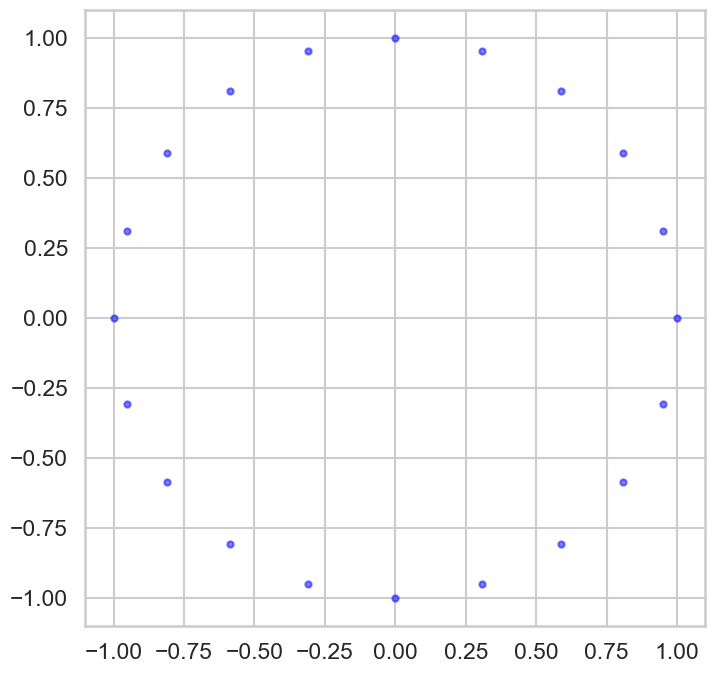

In [30]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

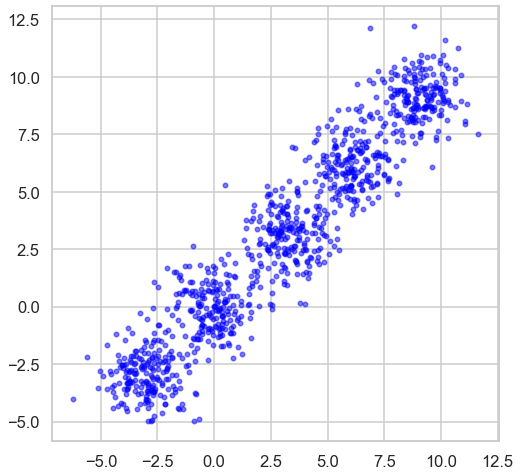

In [6]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

#### 2.3. Example 3 : moons Data Gen and display 

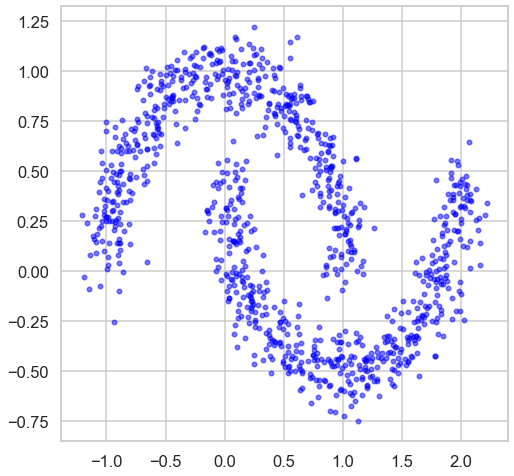

In [18]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


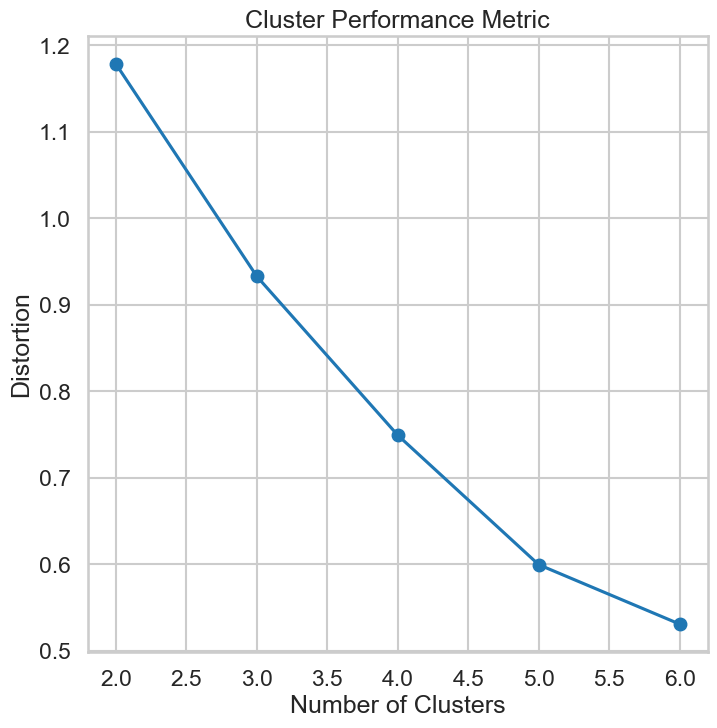

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


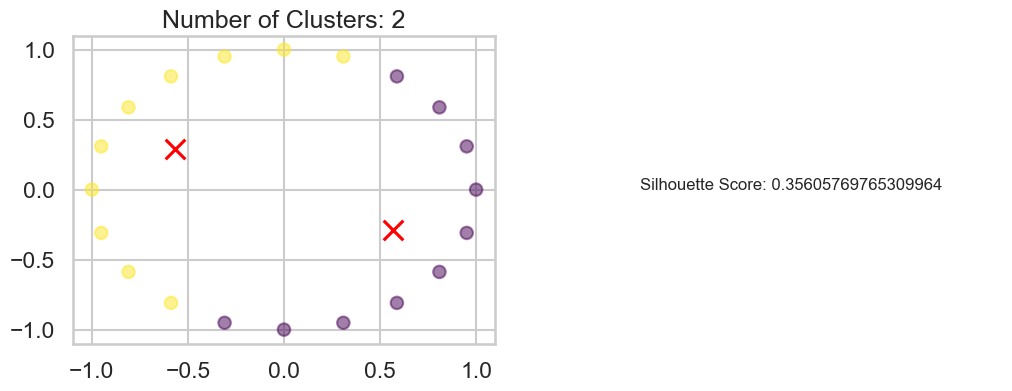

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


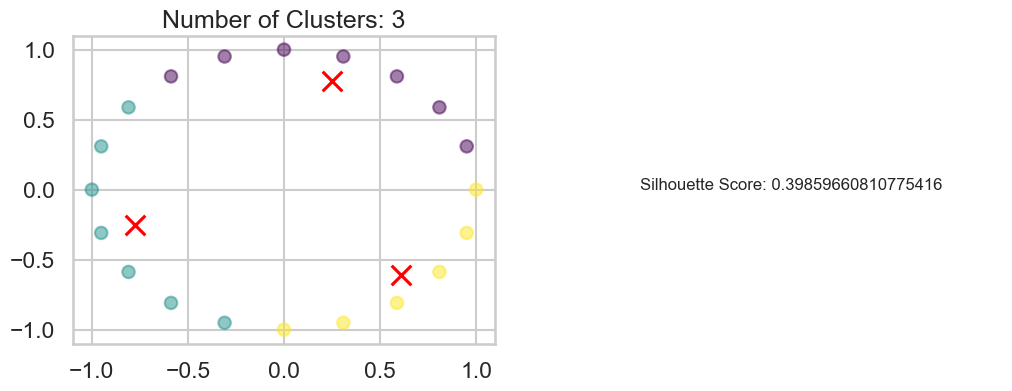

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


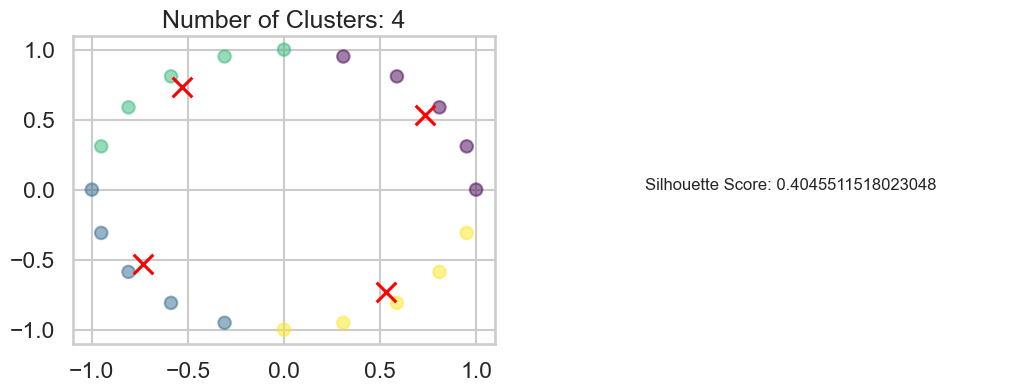

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


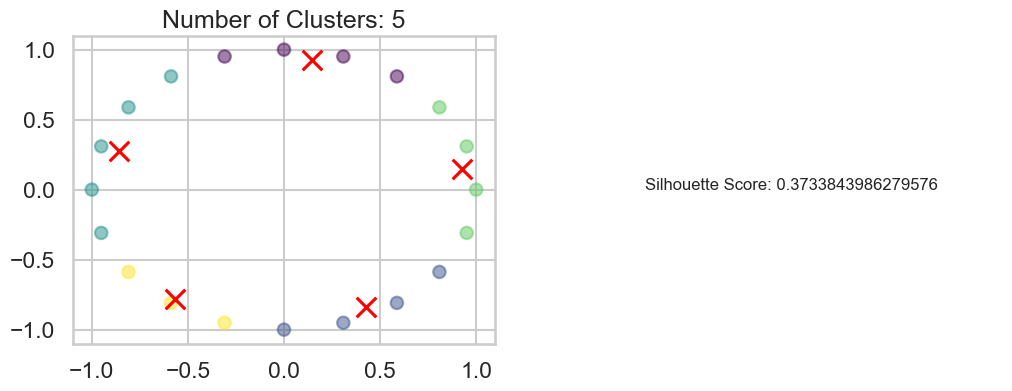

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


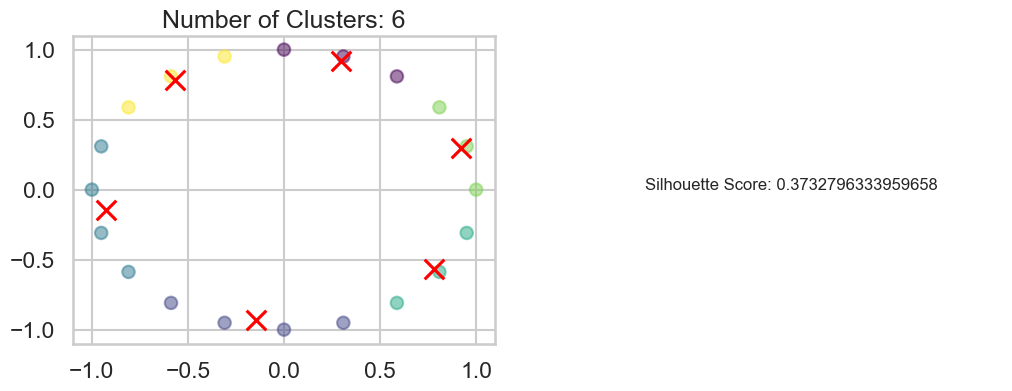

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


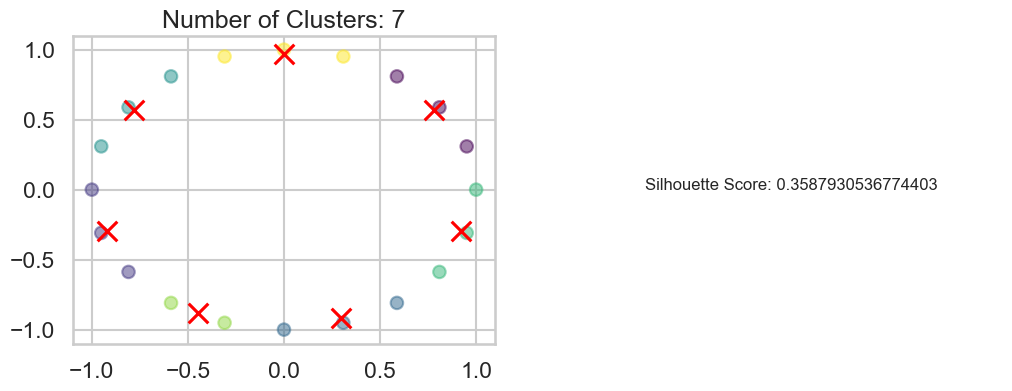

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


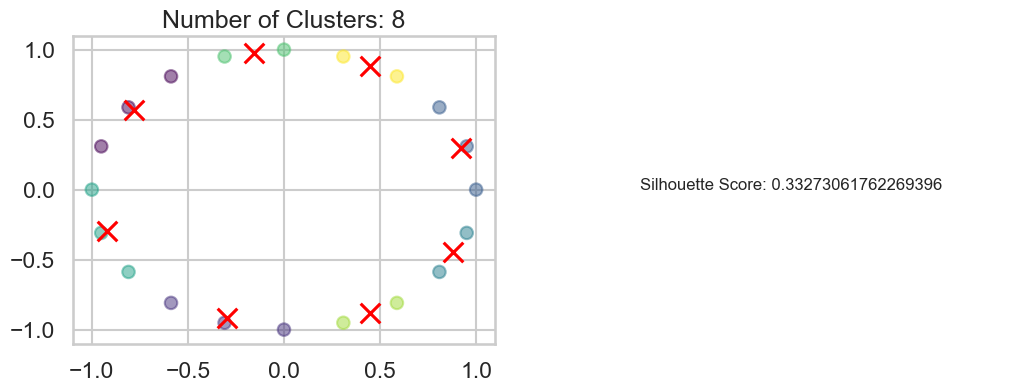

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


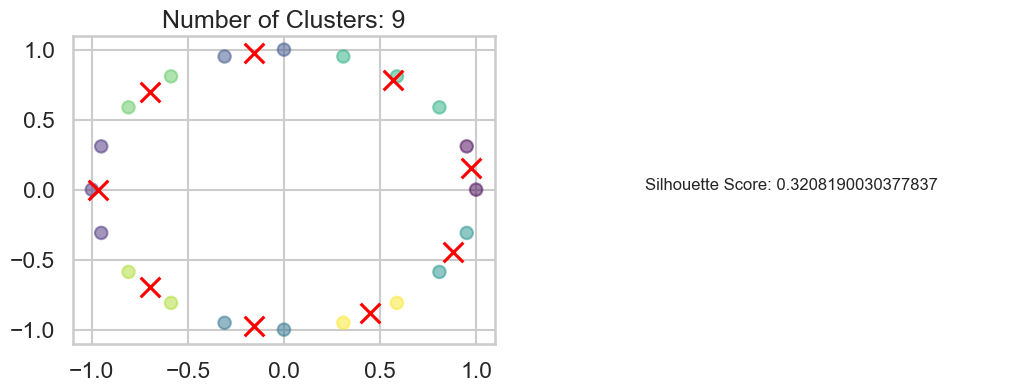

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


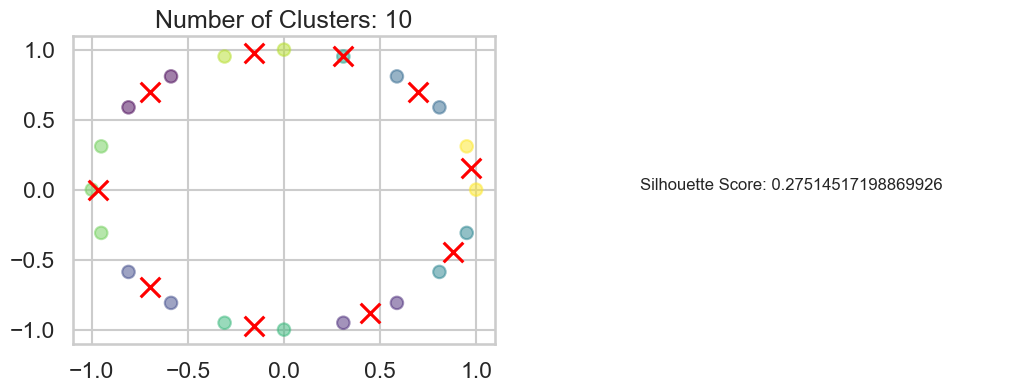

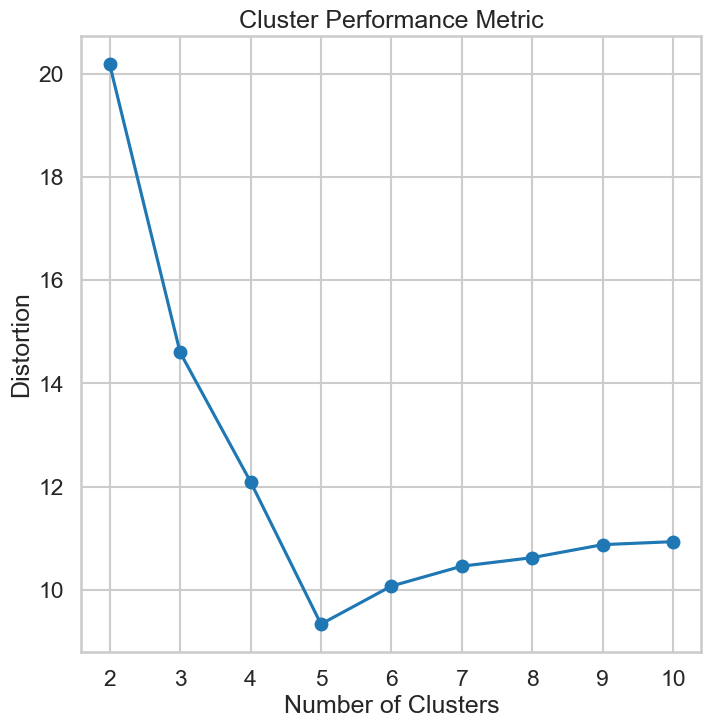

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


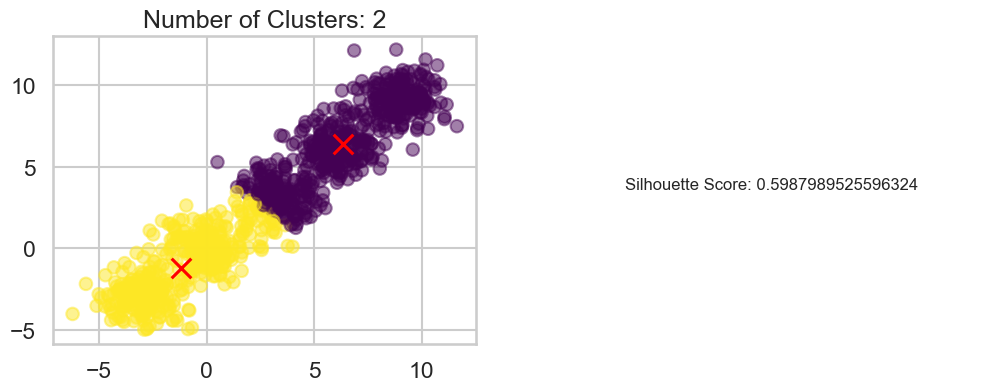

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


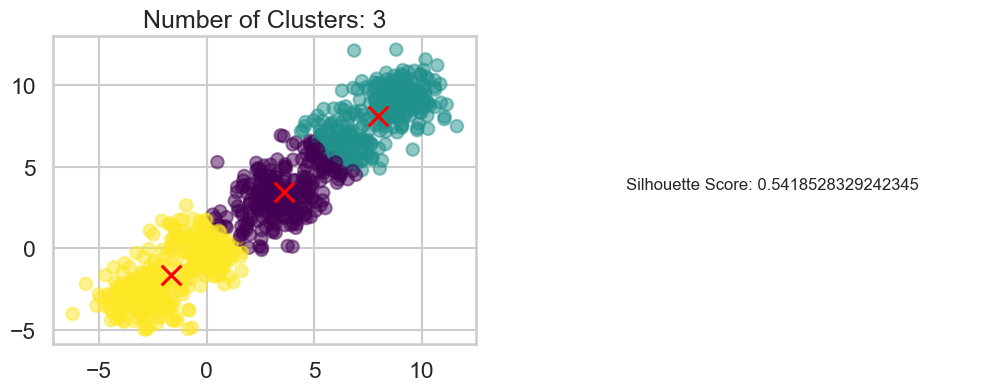

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


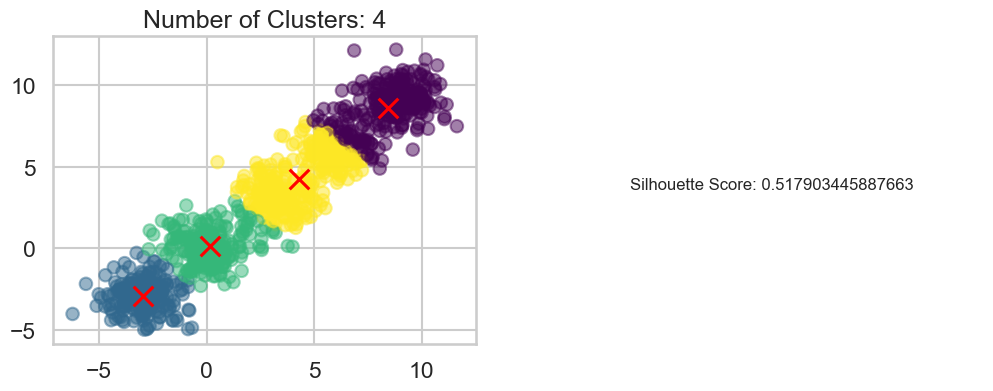

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


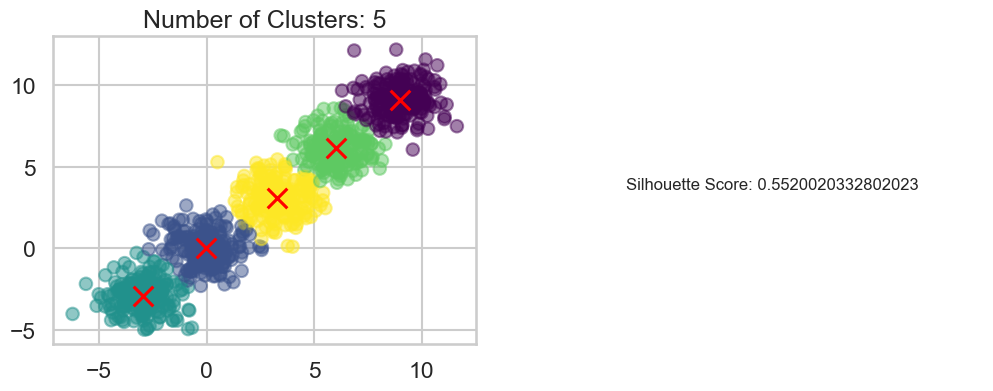

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


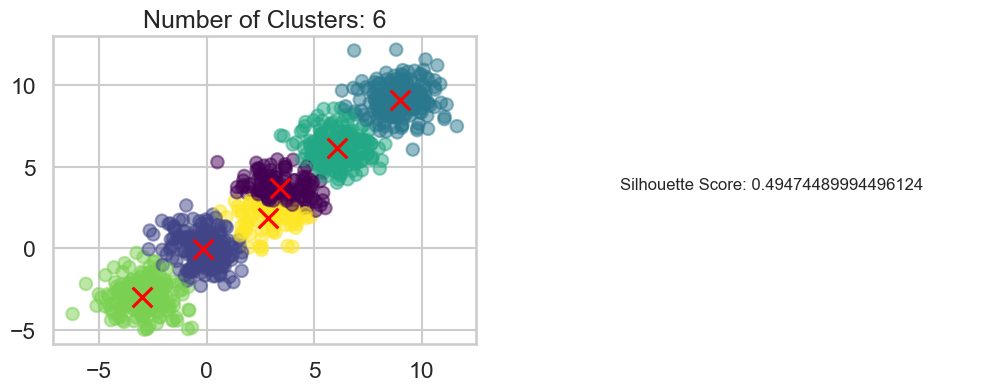

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


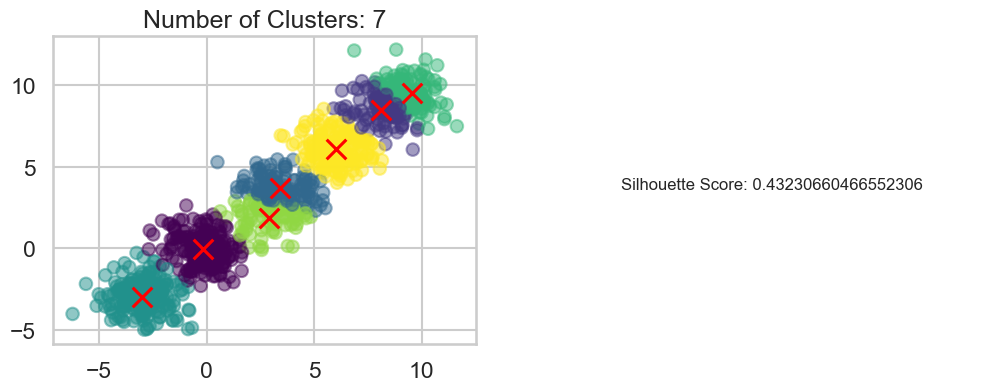

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


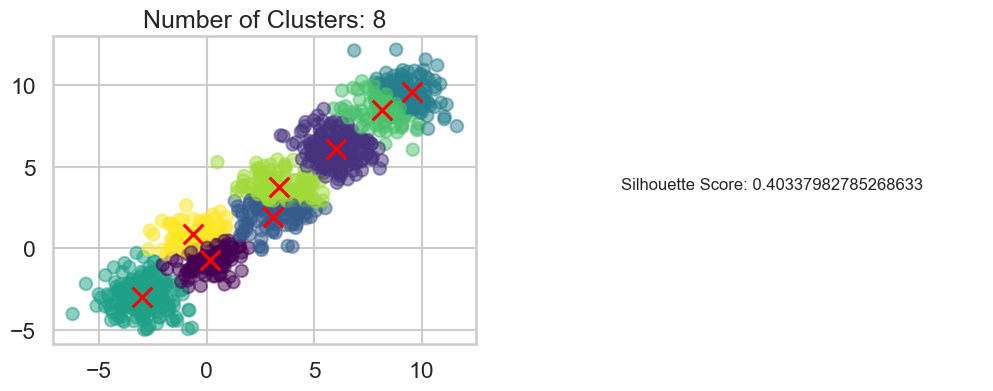

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


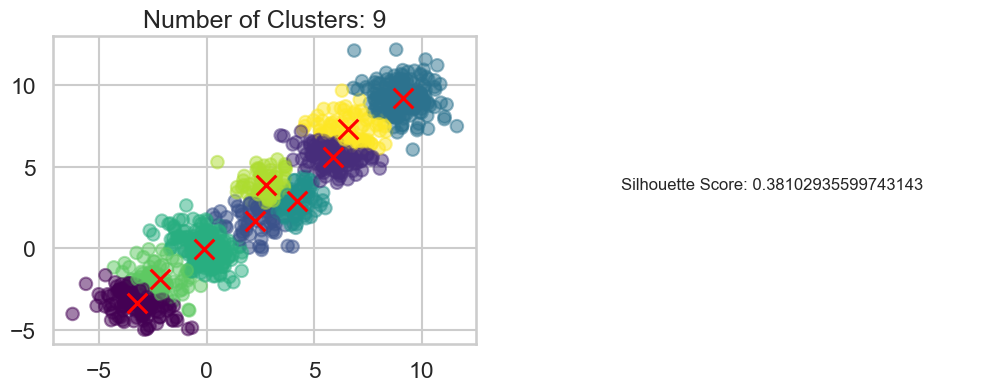

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


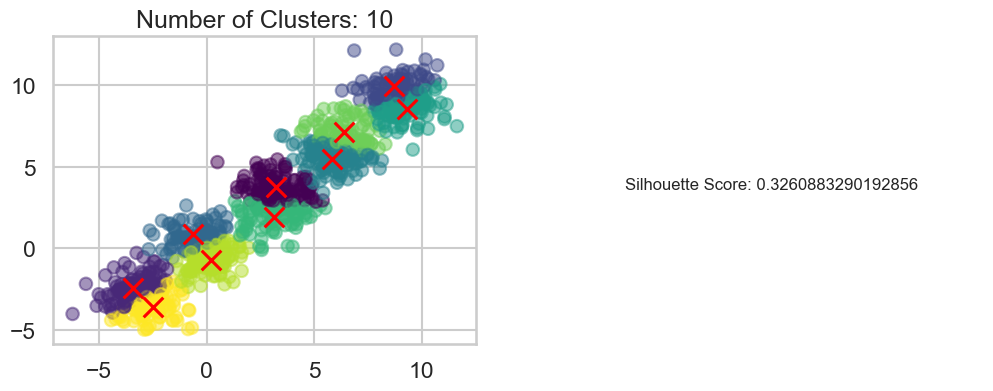

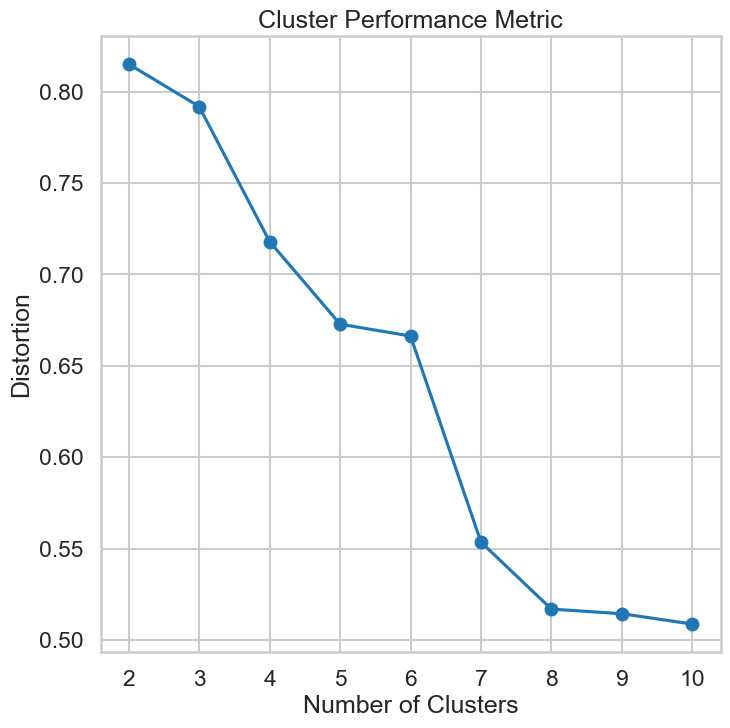

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


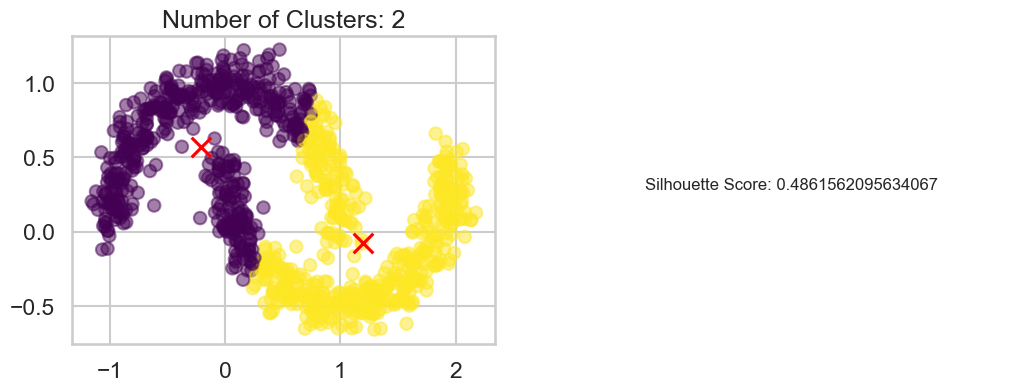

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


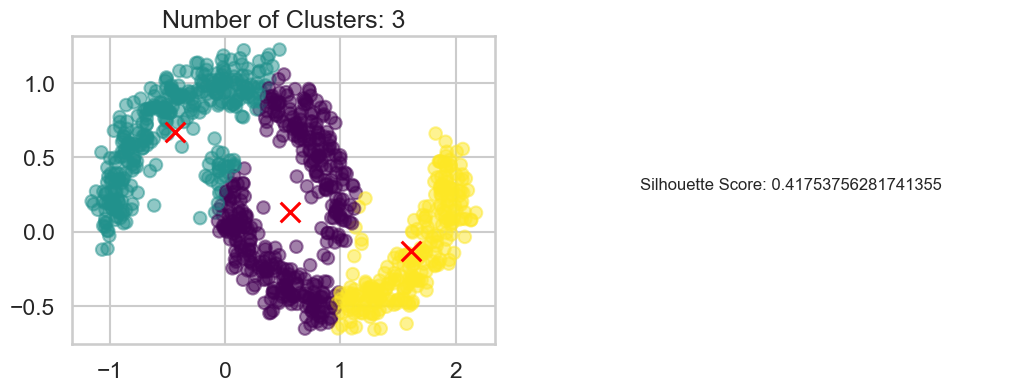

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


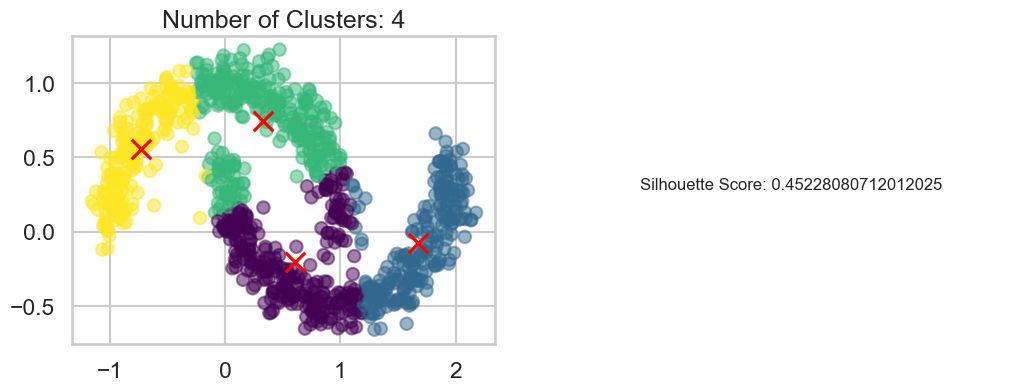

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


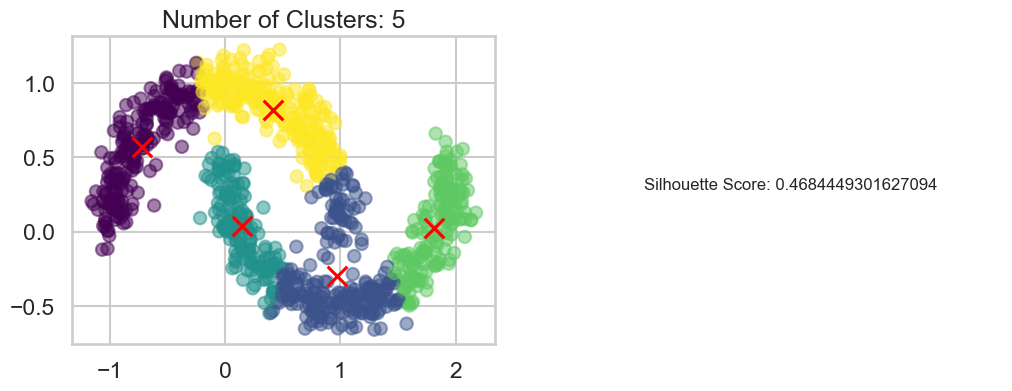

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


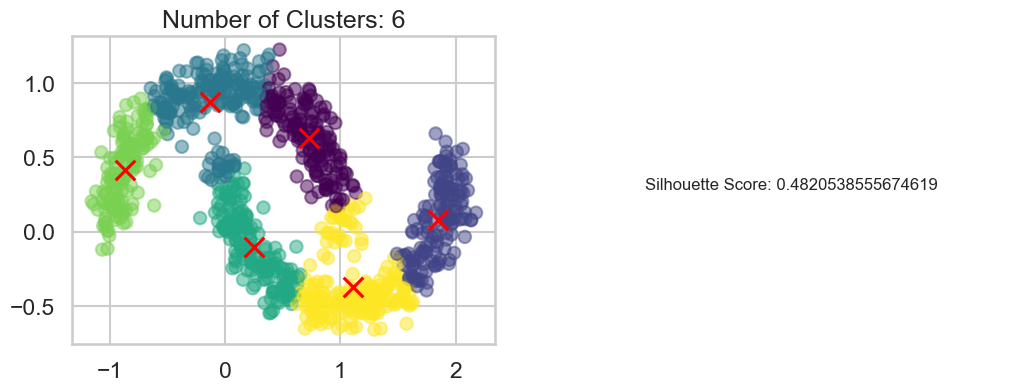

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


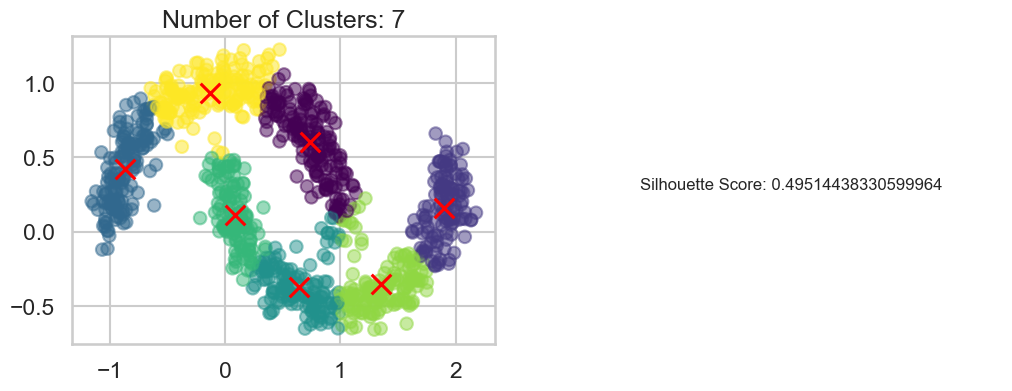

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


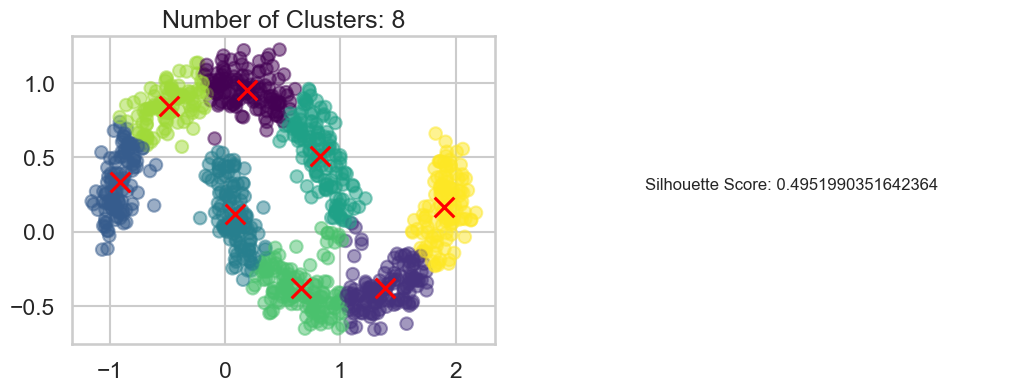

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


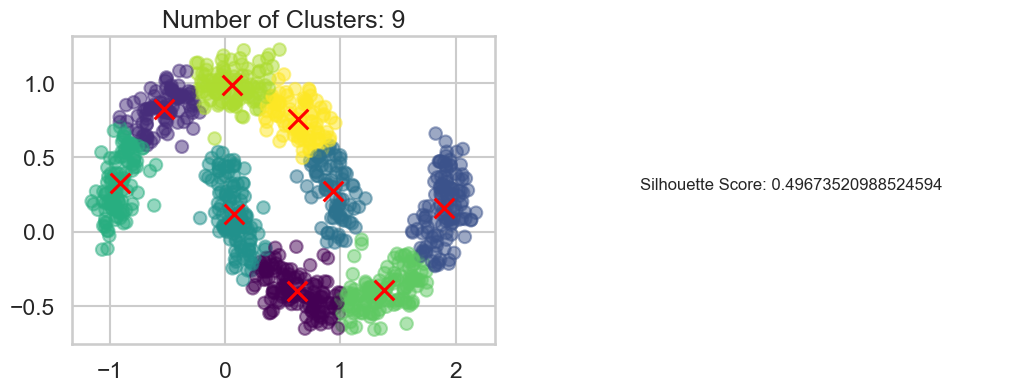

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


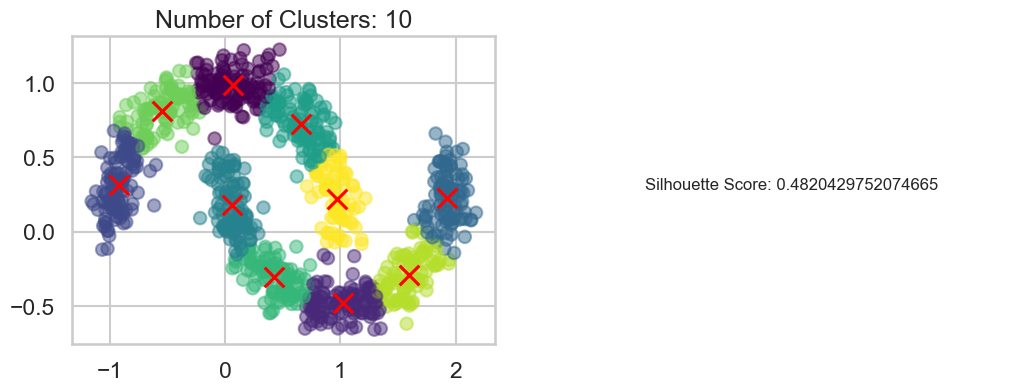

In [33]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def GUC_Kmean_plot(X):
    num_clusters_range = range(2, 11)
    distortion_values = []

    for num_clusters in num_clusters_range:
        _, distortion = GUC_Kmean(X, num_clusters, Distance_Type="euclidean")
        distortion_values.append(distortion)

    # Plot cluster performance metric vs number of clusters
    plt.plot(num_clusters_range, distortion_values, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('Cluster Performance Metric')
    plt.show()

    # Plot clusters for each number of centroids
    for num_clusters in num_clusters_range:
        kmeans = KMeans(n_clusters=num_clusters)
        kmeans.fit(X)
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200)
        plt.title(f'Number of Clusters: {num_clusters}')
        plt.subplot(1, 2, 2)
        silhouette_avg = silhouette_score(X, kmeans.labels_)
        plt.text(0.5, 0.5, f'Silhouette Score: {silhouette_avg}', ha='center', fontsize=12)
        plt.axis('off')
        plt.show()

# Example 1
plt.rcParams['figure.figsize'] = [8, 8]
sns.set_style("whitegrid")
sns.set_context("talk")
angle = np.linspace(0, 2 * np.pi, 20, endpoint=False)
X_example1 = np.append([np.cos(angle)], [np.sin(angle)], 0).transpose()
GUC_Kmean_plot(X_example1)

# Example 2
n_samples = 1000
n_bins = 4
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9, 9)]
X_example2, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                           centers=centers, shuffle=False, random_state=42)
GUC_Kmean_plot(X_example2)

# Example 3
n_samples = 1000
X_example3, y = make_moons(n_samples=n_samples, noise=.1)
GUC_Kmean_plot(X_example3)


## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

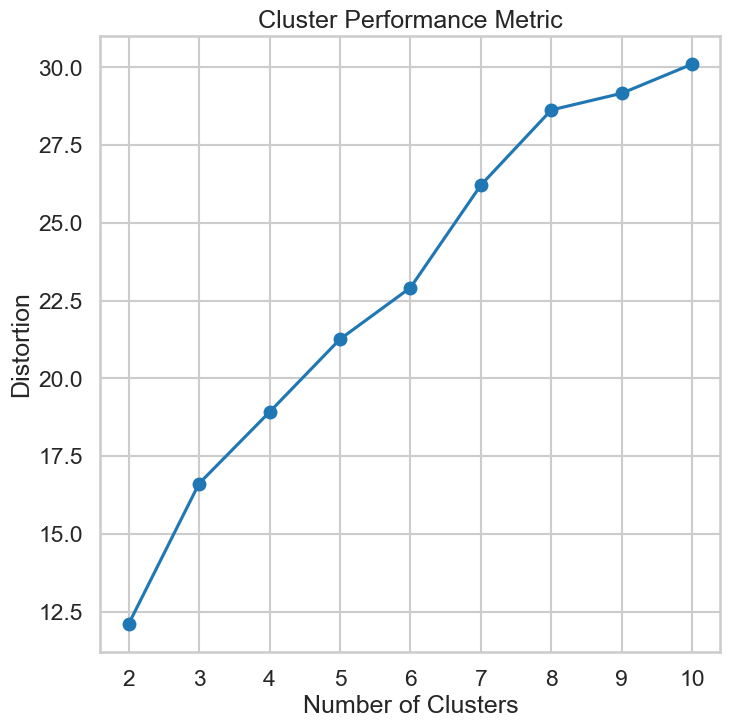

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


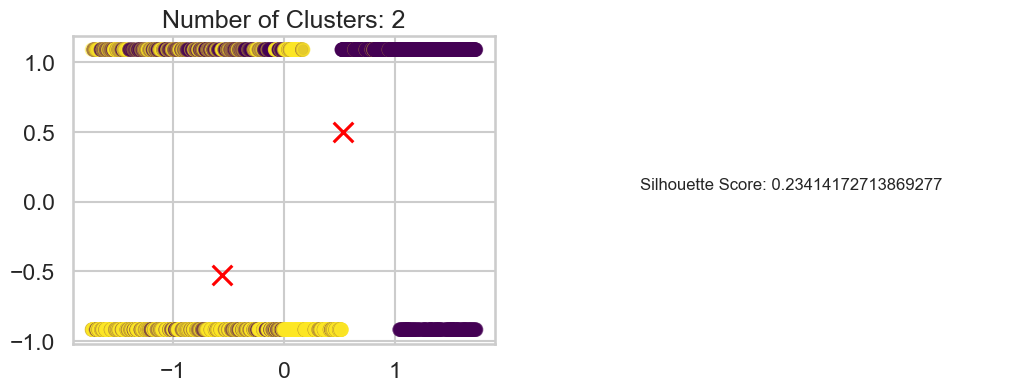

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


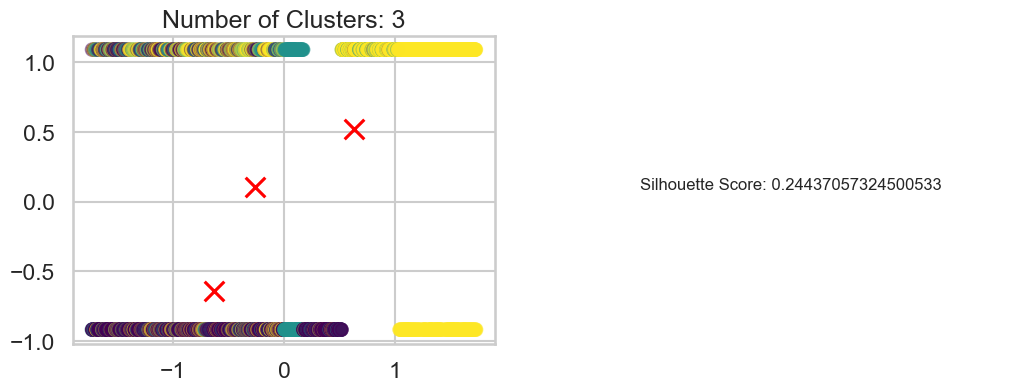

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


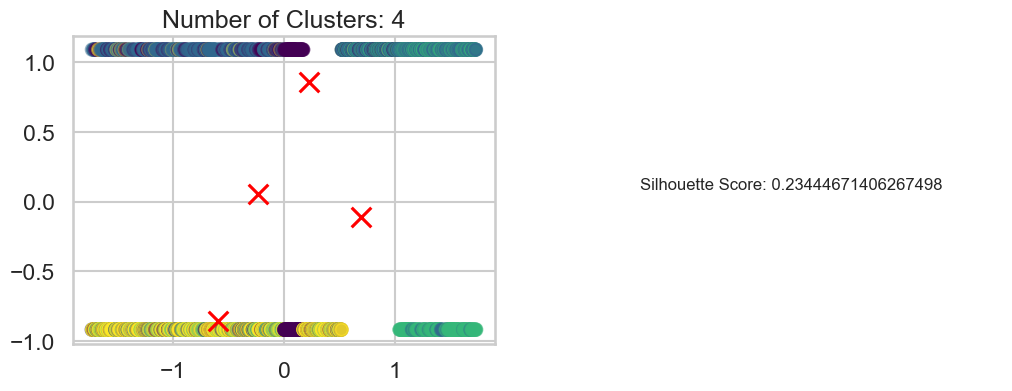

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


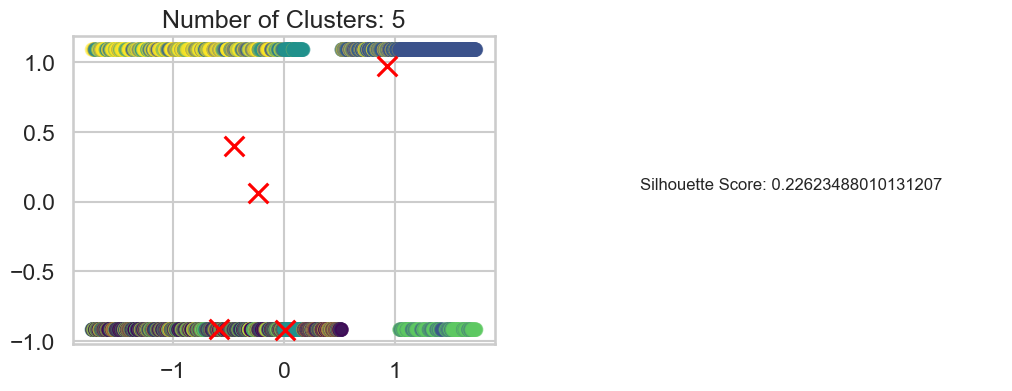

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


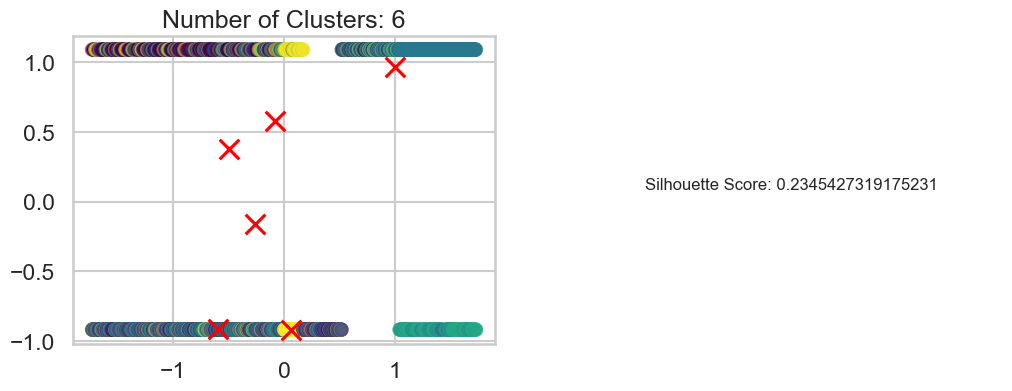

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


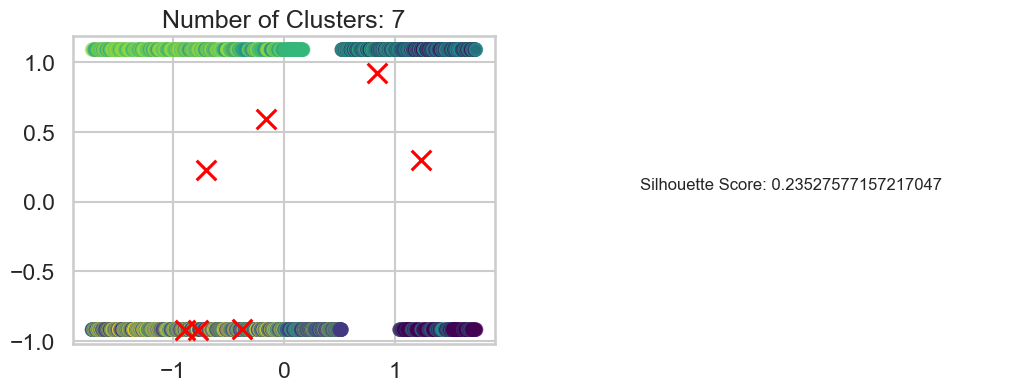

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


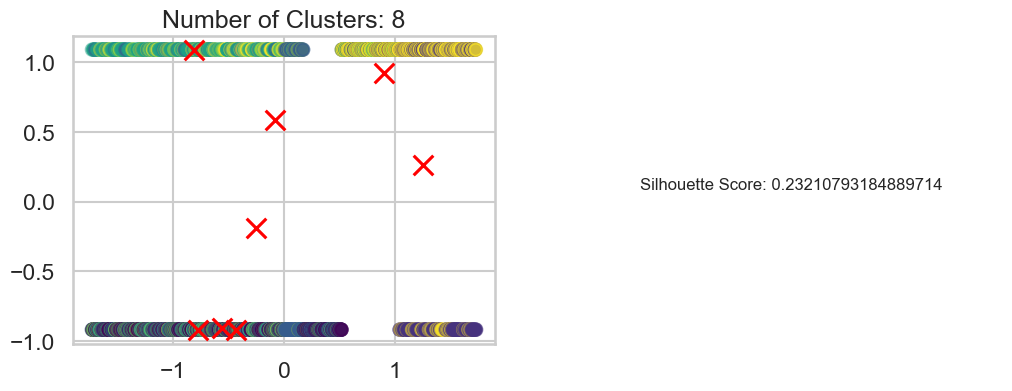

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


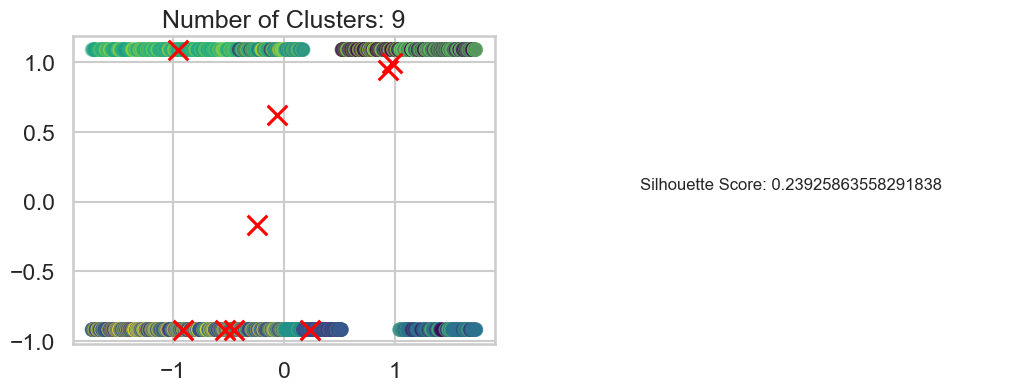

/Users/alaahossam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


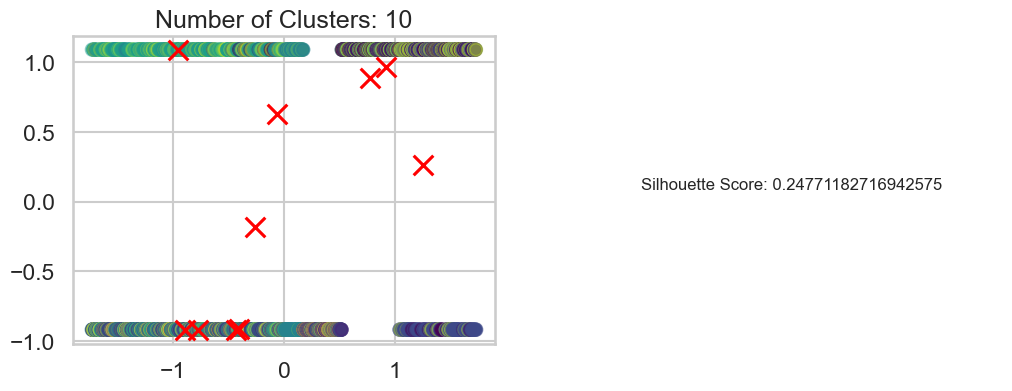

In [35]:
import pandas as pd

# reading customer data from the csv file
customer_data=pd.read_csv('Customer data.csv')
# Remove non-numeric columns and any rows with missing values
customer_data_numeric = customer_data.select_dtypes(include=['number']).dropna()

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data_numeric)

def GUC_Kmean_customer_data(X):
    num_clusters_range = range(2, 11)
    distortion_values = []

    for num_clusters in num_clusters_range:
        _, distortion = GUC_Kmean(X, num_clusters, Distance_Type="euclidean")
        distortion_values.append(distortion)

    # Plot cluster performance metric vs number of clusters
    plt.plot(num_clusters_range, distortion_values, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('Cluster Performance Metric')
    plt.show()

    # Plot clusters for each number of centroids
    for num_clusters in num_clusters_range:
        kmeans = KMeans(n_clusters=num_clusters)
        kmeans.fit(X)
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200)
        plt.title(f'Number of Clusters: {num_clusters}')
        plt.subplot(1, 2, 2)
        silhouette_avg = silhouette_score(X, kmeans.labels_)
        plt.text(0.5, 0.5, f'Silhouette Score: {silhouette_avg}', ha='center', fontsize=12)
        plt.axis('off')
        plt.show()

# Apply GUC_Kmean function to customer data
GUC_Kmean_customer_data(customer_data_scaled)
